# Bike Sharing Data Analysis

In [2]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH AM/PM)
`season` | Season (spring, summer, fall, winter)
`holiday` | Whether day is a holiday or not (Yes or No)
`workingday` | Whether day is a working day or not (Yes or No)
`weather`| Weather condition (Clear or partly cloudy, Mist, Light snow or rain, heavy rain/ice pellets/ snow + fog 
`temp`| Average temperature recorded for the hour ( in degree Celsius)
`temp_feel`| Average feeling temperature recorded for the hour ( in degree Celsius)
`hum`| Average humidity recorded for the hour (in %)
`windspeed`| Average wind speed recorded for the hour (in miles/hour)
`demand`| Hourly count of bikes rented

## Data Wrangling & Visualization

In [3]:
# The dataset is already loaded below
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed
0,8709,2018-08-05 05:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,74.0,16.9979
1,8710,2018-08-05 06:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,79.0,16.9979
2,8712,2018-08-05 08:00:00,fall,No,No,Clear or partly cloudy,31.16,36.365,66.0,22.0028
3,8713,2018-08-05 09:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,23.9994
4,8714,2018-08-05 10:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,27.9993
...,...,...,...,...,...,...,...,...,...,...
1787,10882,2018-12-19 19:00:00,winter,No,Yes,Clear or partly cloudy,15.58,19.695,50.0,26.0027
1788,10883,2018-12-19 20:00:00,winter,No,Yes,Clear or partly cloudy,14.76,17.425,57.0,15.0013
1789,10884,2018-12-19 21:00:00,winter,No,Yes,Clear or partly cloudy,13.94,15.910,61.0,15.0013
1790,10885,2018-12-19 22:00:00,winter,No,Yes,Clear or partly cloudy,13.94,17.425,61.0,6.0032


In [4]:
data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000


In [5]:
#Explore columns
data.columns

Index(['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'demand'],
      dtype='object')

In [6]:
#Description
data.describe()

,id,temp,temp_feel,humidity,windspeed,demand
count,8708.000000,7506.000000,8606.000000,8669.00000,8508.000000,8708.000000
mean,4354.500000,20.089454,23.531261,60.99354,13.048589,4.452725
std,2513.927405,8.023304,8.737997,19.67989,8.311058,1.493963
min,1.000000,0.820000,0.760000,0.00000,0.000000,0.000000
25%,2177.750000,13.940000,15.910000,46.00000,7.001500,3.637586
50%,4354.500000,20.500000,24.240000,60.00000,12.998000,4.867534
75%,6531.250000,26.240000,31.060000,77.00000,19.001200,5.556828
max,8708.000000,41.000000,45.455000,100.00000,56.996900,6.792344


## Feature Selection & Generation


#### Extract Year, Month, Day, and Hour information from the "Timestamp" column
Year, Month, Day, and hour information can carry valuable information, lets say people tend to hire more bikes just before new year or something like that. Extracting those four values from timestamp can help us see the trends related to data.

In [7]:
data.dtypes

id              int64
timestamp      object
season         object
holiday        object
workingday     object
weather        object
temp          float64
temp_feel     float64
humidity      float64
windspeed     float64
demand        float64
dtype: object

In [8]:
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
test["timestamp"] = pd.to_datetime(test["timestamp"], format="%Y-%m-%d %H:%M:%S")
data.dtypes

id                     int64
timestamp     datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
temp_feel            float64
humidity             float64
windspeed            float64
demand               float64
dtype: object

In [9]:
data = data.assign(hour=data.timestamp.dt.hour,
               day=data.timestamp.dt.day,
               month=data.timestamp.dt.month,
               year=data.timestamp.dt.year)
data.drop("timestamp",inplace=True, axis=1)
test = test.assign(hour=test.timestamp.dt.hour,
               day=test.timestamp.dt.day,
               month=test.timestamp.dt.month,
               year=test.timestamp.dt.year)
test.drop("timestamp",inplace=True, axis=1)
data

,id,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand,hour,day,month,year
0,1,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0000,2.772589,0,1,1,2017
1,2,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0000,3.688879,1,1,1,2017
2,3,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0000,3.465736,2,1,1,2017
3,4,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0000,2.564949,3,1,1,2017
4,5,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0000,0.000000,4,1,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,8704,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,19.0012,5.030438,0,5,8,2018
8704,8705,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,16.9979,4.465908,1,5,8,2018
8705,8706,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,19.9995,4.290459,2,5,8,2018
8706,8707,fall,No,No,Clear or partly cloudy,29.52,34.850,74.0,16.9979,3.713572,3,5,8,2018


#### Convert decimal data into categorical data
Grouping numeric features with high range and non-uniform distribution will lead to clear understanding of their effects on success rate.

Selecting 30th, 60th and 90th percentiles to let us fit our numeric daha into categories. Any value which is lower from 30th percentile of the values will be labeled as "low" And value which is between 30th and 60th percentile of our data will be labeled as "medium" And value which have between 60th and 90th percentile of our data will be labeled as "high" And any value higher than this will be labeled as "extreme"

#### Temperature

In [10]:
import numpy as np
low = data['temp'].quantile(0.1)
mid = data['temp'].quantile(0.35)
high = data['temp'].quantile(0.65)
extrhigh = data['temp'].quantile(0.9)

conditions = [(data['temp']<low),
              ((data['temp']>=low) & (data['temp']<mid)),
              ((data['temp']>=mid) & (data['temp']<high)),
              ((data['temp']>=high) & (data['temp']<extrhigh)),
               (data['temp']>=extrhigh)]
test_condt = [(test['temp']<low),
              ((test['temp']>=low) & (test['temp']<mid)),
              ((test['temp']>=mid) & (test['temp']<high)),
              ((test['temp']>=high) & (test['temp']<extrhigh)),
               (test['temp']>=extrhigh)]
tags = ['extrLowTemp','lowTemp', 'medTemp','highTemp','extrHighTemp']
data = data.assign(cat_temp = np.select(conditions,tags))
test = test.assign(cat_temp = np.select(test_condt,tags))

#### temp_feel

In [11]:
low = data['temp_feel'].quantile(0.1)
mid = data['temp_feel'].quantile(0.35)
high = data['temp_feel'].quantile(0.65)
extrhigh = data['temp_feel'].quantile(0.9)

conditions = [(data['temp_feel']<low),
              ((data['temp_feel']>=low) & (data['temp_feel']<mid)),
              ((data['temp_feel']>=mid) & (data['temp_feel']<high)),
              ((data['temp_feel']>=high) & (data['temp_feel']<extrhigh)),
               (data['temp_feel']>=extrhigh)]
test_condt = [(test['temp_feel']<low),
              ((test['temp_feel']>=low) & (test['temp_feel']<mid)),
              ((test['temp_feel']>=mid) & (test['temp_feel']<high)),
              ((test['temp_feel']>=high) & (test['temp_feel']<extrhigh)),
               (test['temp_feel']>=extrhigh)]
tags = ['extrLowTempFeel','lowTempFeel', 'medTempFeel','highTempFeel','extrHighTempFeel']
data = data.assign(cat_temp_feel = np.select(conditions,tags))
test = test.assign(cat_temp_feel = np.select(test_condt,tags))

#### humidity

In [12]:
low = data['humidity'].quantile(0.1)
mid = data['humidity'].quantile(0.35)
high = data['humidity'].quantile(0.65)
extrhigh = data['humidity'].quantile(0.9)

conditions = [(data['humidity']<low),
              ((data['humidity']>=low) & (data['humidity']<mid)),
              ((data['humidity']>=mid) & (data['humidity']<high)),
              ((data['humidity']>=high) & (data['humidity']<extrhigh)),
               (data['humidity']>=extrhigh)]
test_condt = [(test['humidity']<low),
              ((test['humidity']>=low) & (test['humidity']<mid)),
              ((test['humidity']>=mid) & (test['humidity']<high)),
              ((test['humidity']>=high) & (test['humidity']<extrhigh)),
               (test['humidity']>=extrhigh)]
tags = ['extrLowHum','lowHum', 'medHum','highHum','extrHighHum']
data = data.assign(cat_humidity = np.select(conditions,tags))
test = test.assign(cat_humidity = np.select(test_condt,tags))

#### windspeed

In [13]:
low = data['windspeed'].quantile(0.1)
mid = data['windspeed'].quantile(0.35)
high = data['windspeed'].quantile(0.65)
extrhigh = data['windspeed'].quantile(0.9)

conditions = [(data['windspeed']<low),
              ((data['windspeed']>=low) & (data['windspeed']<mid)),
              ((data['windspeed']>=mid) & (data['windspeed']<high)),
              ((data['windspeed']>=high) & (data['windspeed']<extrhigh)),
               (data['windspeed']>=extrhigh)]
test_condt = [(test['windspeed']<low),
              ((test['windspeed']>=low) & (test['windspeed']<mid)),
              ((test['windspeed']>=mid) & (test['windspeed']<high)),
              ((test['windspeed']>=high) & (test['windspeed']<extrhigh)),
               (test['windspeed']>=extrhigh)]
tags = ['extrLowWindspeed','lowWindspeed', 'medWindspeed','highWindspeed','extrHighWindspeed']
data = data.assign(cat_windspeed = np.select(conditions,tags))
test = test.assign(cat_windspeed = np.select(test_condt,tags))

#### Dropping redundant columns

In [14]:
data.drop("temp",inplace=True, axis=1)
data.drop("temp_feel",inplace=True, axis=1)
data.drop("humidity",inplace=True, axis=1)
data.drop("windspeed",inplace=True, axis=1)
test.drop("temp",inplace=True, axis=1)
test.drop("temp_feel",inplace=True, axis=1)
test.drop("humidity",inplace=True, axis=1)
test.drop("windspeed",inplace=True, axis=1)
data

,id,season,holiday,workingday,weather,demand,hour,day,month,year,cat_temp,cat_temp_feel,cat_humidity,cat_windspeed
0,1,spring,No,No,Clear or partly cloudy,2.772589,0,1,1,2017,lowTemp,lowTempFeel,highHum,lowWindspeed
1,2,spring,No,No,Clear or partly cloudy,3.688879,1,1,1,2017,lowTemp,lowTempFeel,highHum,lowWindspeed
2,3,spring,No,No,Clear or partly cloudy,3.465736,2,1,1,2017,lowTemp,lowTempFeel,highHum,lowWindspeed
3,4,spring,No,No,Clear or partly cloudy,2.564949,3,1,1,2017,lowTemp,lowTempFeel,highHum,lowWindspeed
4,5,spring,No,No,Clear or partly cloudy,0.000000,4,1,1,2017,lowTemp,lowTempFeel,highHum,lowWindspeed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,8704,fall,No,No,Clear or partly cloudy,5.030438,0,5,8,2018,extrHighTemp,extrHighTempFeel,highHum,highWindspeed
8704,8705,fall,No,No,Clear or partly cloudy,4.465908,1,5,8,2018,extrHighTemp,extrHighTempFeel,highHum,highWindspeed
8705,8706,fall,No,No,Clear or partly cloudy,4.290459,2,5,8,2018,extrHighTemp,extrHighTempFeel,highHum,highWindspeed
8706,8707,fall,No,No,Clear or partly cloudy,3.713572,3,5,8,2018,highTemp,extrHighTempFeel,highHum,highWindspeed


## Data Analysis
In this section, I will be analyzing data and creating plots to show what effects higher demand

### Season
As it can be seen below; most of the seasons have similar demands but season 0, which is "spring" has lower demand

In [15]:
seasonalDemand = data[['season','demand']]
seasonalDemand = seasonalDemand.groupby(['season']).mean().sort_values(by=['demand'], ascending = False)
seasonalDemand

,demand
season,
fall,4.770098
summer,4.703267
winter,4.426184
spring,3.984206


### Weather
As it can be seen below, the range of demand is wider in weather with Light snow of rain having the least demand, this shows that when weather condition is softer, people tend not to use bikes, which is contradicts what an actual human would do. Who doesn't love to use their bikes while sun is shining? Maybe this shows us people tend to use bikes when they try to escape weather-locked traffic.

In [16]:
weatherDemand = data[['weather','demand']]
weatherDemand = weatherDemand.groupby(['weather']).mean().sort_values(by=['demand'], ascending = False)
weatherDemand

,demand
weather,
heavy rain/ice pellets/snow + fog,5.099866
Clear or partly cloudy,4.544039
Mist,4.405137
Light snow or rain,3.839389


### Holiday
The data below shows that Holidays do not effect the use of the bikes.

In [17]:
holidayDemand = data[['holiday','demand']]
holidayDemand = holidayDemand.groupby(['holiday']).mean().sort_values(by=['demand'], ascending = False)
holidayDemand

,demand
holiday,
No,4.453008
Yes,4.442705


### Workingday
As we observed in holiday, working days also have a low effect on bike usage.

In [18]:
workdayDemand = data[['workingday','demand']]
workdayDemand = workdayDemand.groupby(['workingday']).mean().sort_values(by=['demand'], ascending = False)
workdayDemand

,demand
workingday,
No,4.492536
Yes,4.434262


### Hours of day
The plot below shows us that, people tend to use the bikes when they are going to work (7-9) or coming back from the work (16-18) at most, while late-night time seeing the lowest usages of the bikes

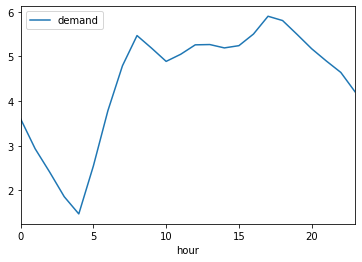

In [19]:
hourlyDemand = data[['hour','demand']]
hourlyDemand = hourlyDemand.groupby(['hour']).mean()
hourlyDemand.plot()

### Days of the Month
Do not let the sharp edges of the plot below distract you, daily demand ranges between 4.3-4.6, which does not provide any usefull info, hence we can drop this column later on.

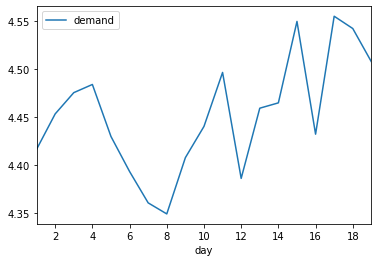

In [20]:
dailyDemand = data[['day','demand']]
dailyDemand = dailyDemand.groupby(['day']).mean()
dailyDemand.plot()

### Months of the Year
The plot below shows us that people tend to use bikes when it is summer, but avoid using it when it is winter, which is an usefull information, hence this column will be kept.

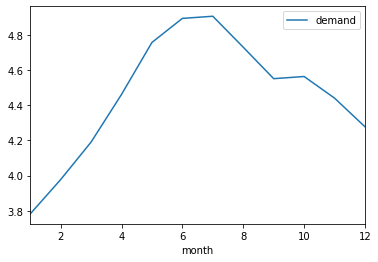

In [21]:
monthlyDemand = data[['month','demand']]
monthlyDemand = monthlyDemand.groupby(['month']).mean()
monthlyDemand.plot()

### Years of the... Life?
The data below shows us that popularity of the app increases as the time passes, therefore we can convert this information into another column: How many years passed since 2017, then the model we built can use this value as a multiplier for its results... maybe?

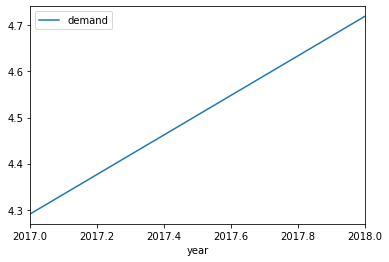

In [22]:
yearlyDemand = data[['year','demand']]
yearlyDemand = yearlyDemand.groupby(['year']).mean()
yearlyDemand.plot()

In [23]:
data = data.assign(years_multiplier = data.year - 2017)
test = test.assign(years_multiplier = test.year - 2017)

### Categorical Temperatures
Higher the temperature, higher the demand.

In [24]:
tempDemand = data[['cat_temp','demand']]
tempDemand = tempDemand.groupby(['cat_temp']).mean().sort_values(by=['demand'], ascending = False)
tempDemand

,demand
cat_temp,
extrHighTemp,5.536945
highTemp,4.791361
0,4.482665
medTemp,4.468095
lowTemp,3.955310
extrLowTemp,3.341200


In [25]:
tempFeelDemand = data[['cat_temp_feel','demand']]
tempFeelDemand = tempFeelDemand.groupby(['cat_temp_feel']).mean().sort_values(by=['demand'], ascending = False)
tempFeelDemand

,demand
cat_temp_feel,
extrHighTempFeel,5.424973
highTempFeel,4.867460
medTempFeel,4.437806
0,4.208293
lowTempFeel,3.944204
extrLowTempFeel,3.443129


### Categorical Humidity
Lower the humidity, higher the demand.

In [26]:
humidityDemand = data[['cat_humidity','demand']]
humidityDemand = humidityDemand.groupby(['cat_humidity']).mean().sort_values(by=['demand'], ascending = False)
humidityDemand

,demand
cat_humidity,
extrLowHum,5.246886
lowHum,4.919135
0,4.484182
medHum,4.455558
highHum,4.082694
extrHighHum,3.546822


### Categorical Windspeed
Faster the wind, higher the demand. People love to feel the wind, don't they?

In [27]:
windspeedDemand = data[['cat_windspeed','demand']]
windspeedDemand = windspeedDemand.groupby(['cat_windspeed']).mean().sort_values(by=['demand'], ascending = False)
windspeedDemand

,demand
cat_windspeed,
extrHighWindspeed,4.740469
highWindspeed,4.620872
medWindspeed,4.439793
0,4.388720
lowWindspeed,4.179588


## Convert text data into numerical data

In [28]:
list(data.weather.unique())

['Clear or partly cloudy',
 'Mist',
 'Light snow or rain',
 'heavy rain/ice pellets/snow + fog']

There are 4 different states for "Weather" feature, best we can do is to convert those text data into categorical data to help the model for processing.

In [29]:
data["weather"] = pd.factorize(data.weather)[0]
test["weather"] = pd.factorize(test.weather)[0]

Then I check if there is any "made up" seasons, a.k.a. corrupted data. It seems like "season" column has only four seasons as expected. Then I will be converting that text data into numerical data too. As well as other categorical data.

In [30]:
list(data.season.unique())

['spring', 'summer', 'fall', 'winter']

In [31]:
data["season"] = pd.factorize(data.season)[0]
data["holiday"] = pd.factorize(data.holiday)[0]
data["workingday"] = pd.factorize(data.workingday)[0]
test["season"] = pd.factorize(test.season)[0]
test["holiday"] = pd.factorize(test.holiday)[0]
test["workingday"] = pd.factorize(test.workingday)[0]
data

,id,season,holiday,workingday,weather,demand,hour,day,month,year,cat_temp,cat_temp_feel,cat_humidity,cat_windspeed,years_multiplier
0,1,0,0,0,0,2.772589,0,1,1,2017,lowTemp,lowTempFeel,highHum,lowWindspeed,0
1,2,0,0,0,0,3.688879,1,1,1,2017,lowTemp,lowTempFeel,highHum,lowWindspeed,0
2,3,0,0,0,0,3.465736,2,1,1,2017,lowTemp,lowTempFeel,highHum,lowWindspeed,0
3,4,0,0,0,0,2.564949,3,1,1,2017,lowTemp,lowTempFeel,highHum,lowWindspeed,0
4,5,0,0,0,0,0.000000,4,1,1,2017,lowTemp,lowTempFeel,highHum,lowWindspeed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,8704,2,0,0,0,5.030438,0,5,8,2018,extrHighTemp,extrHighTempFeel,highHum,highWindspeed,1
8704,8705,2,0,0,0,4.465908,1,5,8,2018,extrHighTemp,extrHighTempFeel,highHum,highWindspeed,1
8705,8706,2,0,0,0,4.290459,2,5,8,2018,extrHighTemp,extrHighTempFeel,highHum,highWindspeed,1
8706,8707,2,0,0,0,3.713572,3,5,8,2018,highTemp,extrHighTempFeel,highHum,highWindspeed,1


## Modeling, Machine Learning

Build a model that can predict hourly demand and identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of mean absolute error.**
- **Read the test.csv file and prepare features for testing.**

I will be selecting and generating features in this section and apply that changes to the test data aswell to prevent future errors.

> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `demand` variable. Submit a CSV file with a header row and one row per test entry.
    
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **demand**

### Converting all values into numeric values

In [32]:
#!pip install lightgbm
import lightgbm as lgb
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

data_demand = data["demand"]

encoder = LabelEncoder()
data = data.apply(encoder.fit_transform)
ids = test["id"]
test = test.apply(encoder.fit_transform)
test["id"] = ids

data["demand"] = data_demand
data.dtypes

id                    int64
season                int64
holiday               int64
workingday            int64
weather               int64
demand              float64
hour                  int64
day                   int64
month                 int64
year                  int64
cat_temp              int64
cat_temp_feel         int64
cat_humidity          int64
cat_windspeed         int64
years_multiplier      int64
dtype: object

### Splitting data into train, test and validation sets

In [33]:
frac = 0.2
size = int(len(data)*frac)

trainSet = data[:-2*size]
testSet = data[-2*size:]

### Using different models to see which one is better

### Linear Regression:

In [34]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

features = trainSet.columns.drop(['demand','id'])


regr = linear_model.LinearRegression()
regr.fit(trainSet[features], trainSet['demand'])

demandPred = regr.predict(testSet[features])

print('Mean squared error: ', mean_squared_error(testSet["demand"], demandPred))


Mean squared error:  1.8230404558537736


### Support Vector Machine:

In [35]:
from sklearn import svm

regr = svm.SVR(gamma = "auto") # Auto gives less error than Scale
regr.fit(trainSet[features], trainSet['demand'])

demandPred = regr.predict(testSet[features])

print('Mean squared error: ', mean_squared_error(testSet["demand"], demandPred))


Mean squared error:  0.6848930011906391


### Ridge regression with Cross-Validation:

In [36]:
regr = linear_model.RidgeCV()
regr.fit(trainSet[features], trainSet['demand'])

demandPred = regr.predict(testSet[features])

print('Mean squared error: ', mean_squared_error(testSet["demand"], demandPred))


Mean squared error:  1.8229995324420416


### Lasso:

In [37]:
regr = linear_model.Lasso(alpha=1)
regr.fit(trainSet[features], trainSet['demand'])

demandPred = regr.predict(testSet[features])

print('Mean squared error: ', mean_squared_error(testSet["demand"], demandPred))


Mean squared error:  1.7083703612366365


### Bayesian Ridge:

In [38]:
regr = linear_model.BayesianRidge()
regr.fit(trainSet[features], trainSet['demand'])

demandPred = regr.predict(testSet[features])

print('Mean squared error: ', mean_squared_error(testSet["demand"], demandPred))


Mean squared error:  1.8223162483387039


## Results
As it can be observed in the previous chapter, SVM's gave the best results, hence I will be using it for submission.

In [39]:
regr = svm.SVR(gamma = "auto") # Auto gives less error than Scale
regr.fit(trainSet[features], trainSet['demand'])

demandPred = regr.predict(test[features])
submission_df = test
submission_df["demand"] = demandPred
submission_df.drop(submission_df.columns.difference(["id","demand"]),axis = 1,inplace=True)
submission_df

,id,demand
0,8709,2.587383
1,8710,3.268959
2,8712,4.519101
3,8713,4.447788
4,8714,4.334199
...,...,...
1787,10882,5.562910
1788,10883,5.460196
1789,10884,5.148780
1790,10885,4.896687


In [40]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---